# Import Library

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import r2_score, f1_score, roc_auc_score, accuracy_score, recall_score, precision_score, confusion_matrix, classification_report, mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Read Data

In [51]:
data = pd.read_csv("Data/Breast_Cancer_Classification.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Simple Data Cleaning

In [52]:
data = data.drop(columns=["id", "Unnamed: 32"])
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Drop 2 kolom yang tidak penting sama sekali yaitu hanya sebuah ID dan Unnamed Columns

In [53]:
data_out = data.pop("diagnosis")
data["diagnosis"] = data_out
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


#### Pindahin data Label / Target ke paling akhir / ujung biar memudahkan untuk melakukan iterasi for each nantinya ataupun ketika ingin memisahkan data x dan y.

# EDA

In [54]:
data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [55]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [56]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [57]:
data.count()

radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
diagnosis                  569
dtype: int64

In [58]:
data.sum()

radius_mean                                                         8038.429
texture_mean                                                        10975.81
perimeter_mean                                                      52330.38
area_mean                                                           372631.9
smoothness_mean                                                       54.829
compactness_mean                                                    59.37002
concavity_mean                                                     50.526811
concave points_mean                                                27.834994
symmetry_mean                                                       103.0811
fractal_dimension_mean                                              35.73184
radius_se                                                           230.5429
texture_se                                                          692.3896
perimeter_se                                                       1630.7877

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [60]:
data.shape

(569, 31)

In [61]:
data.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

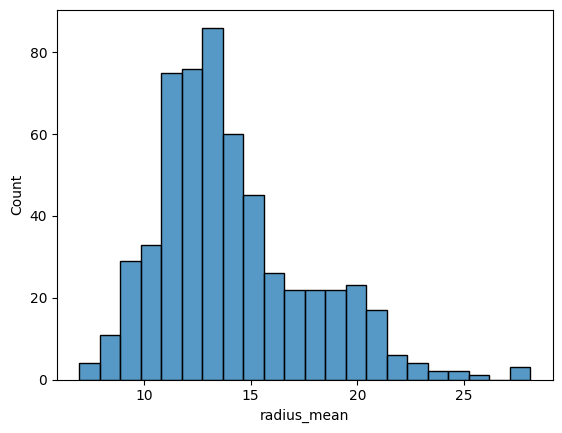

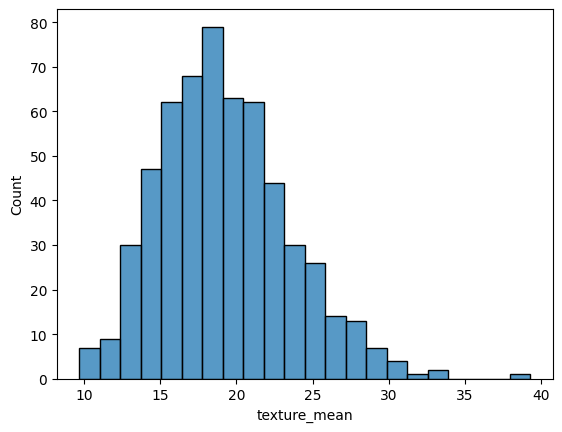

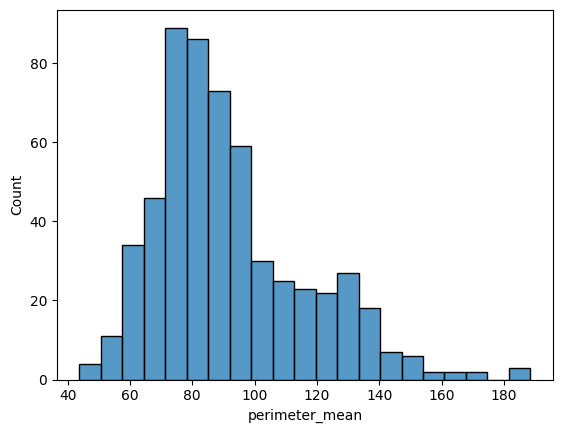

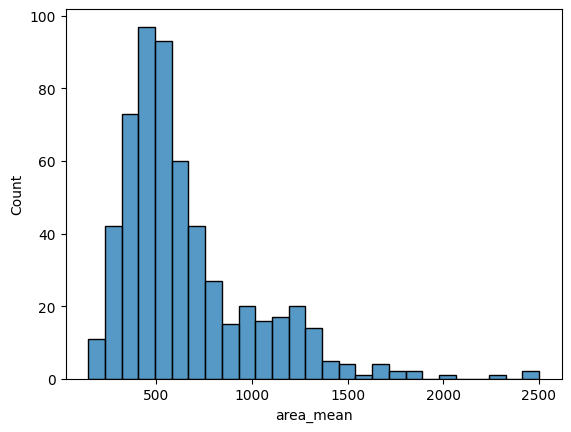

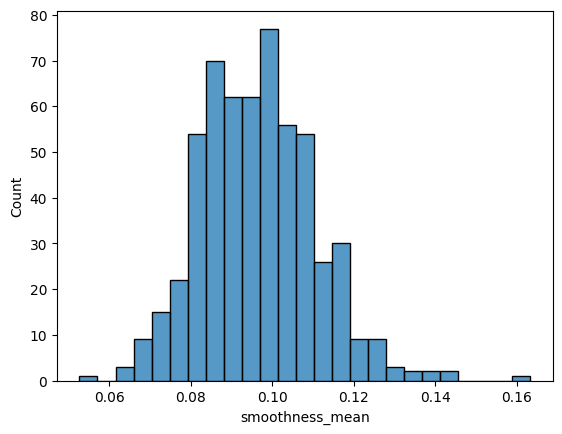

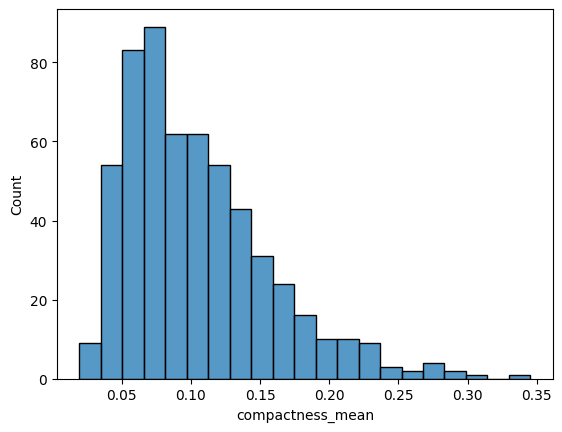

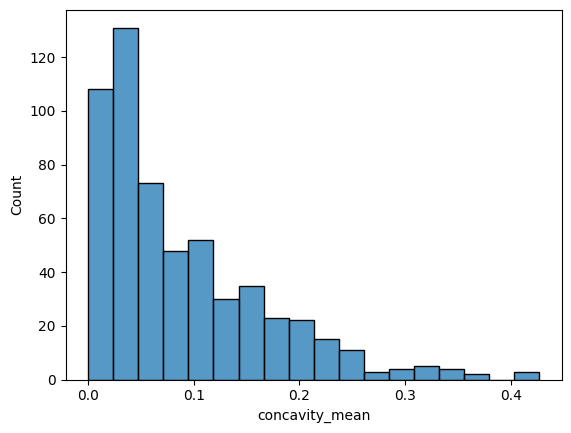

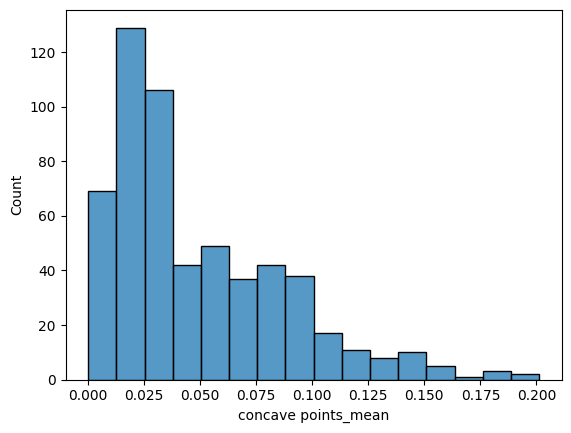

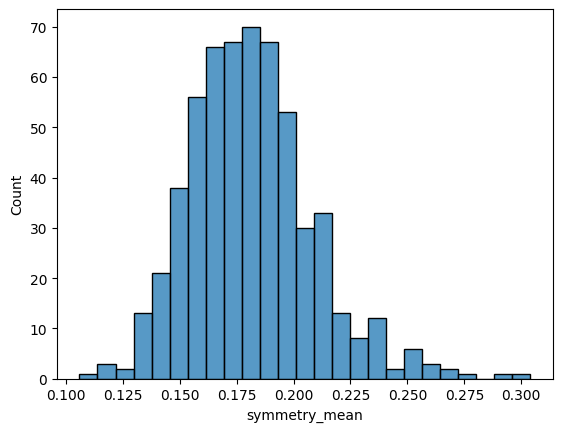

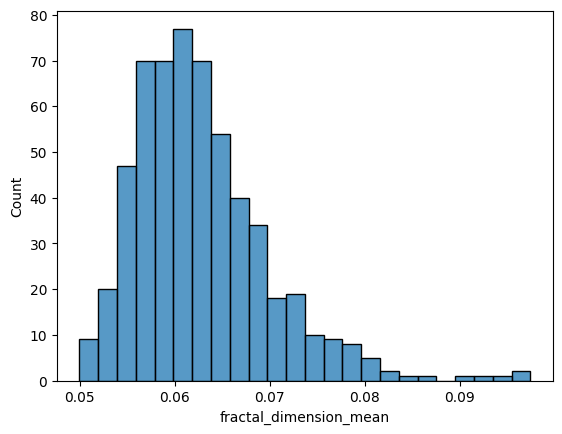

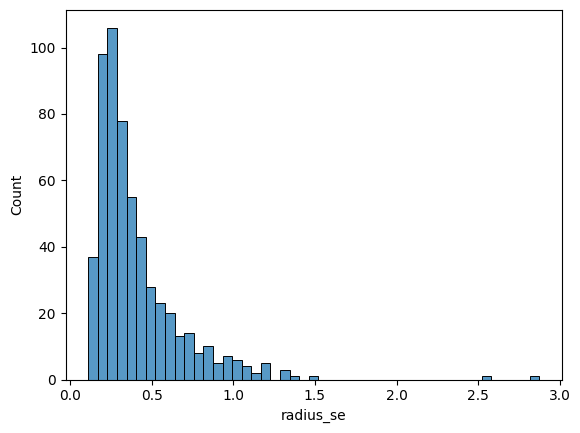

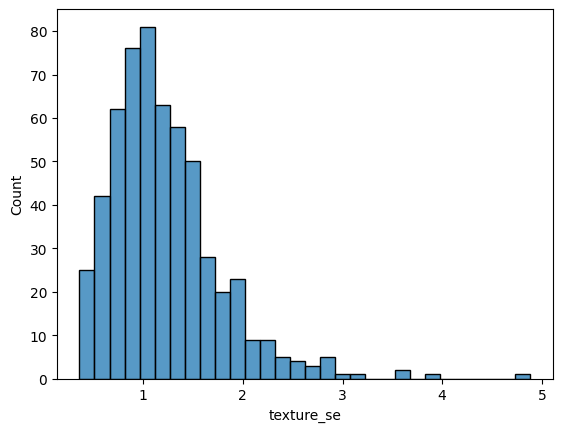

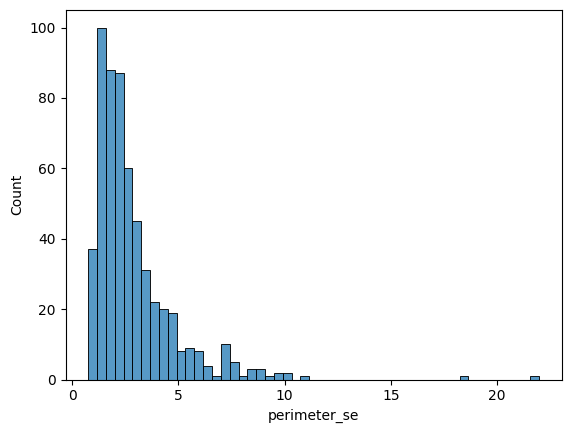

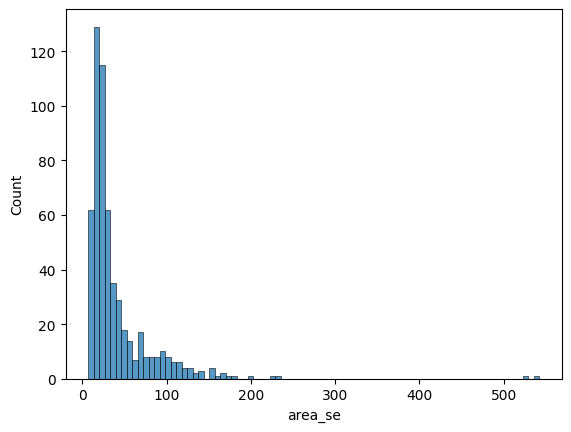

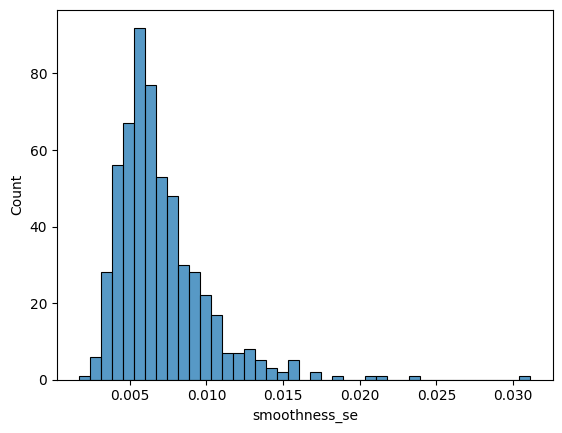

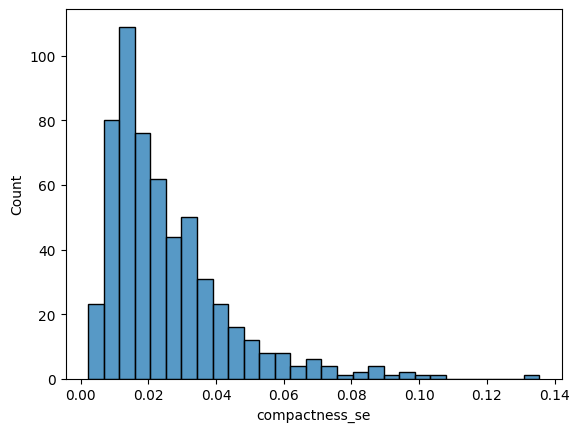

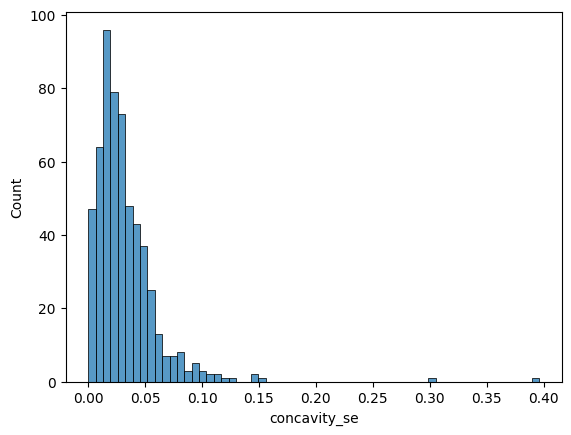

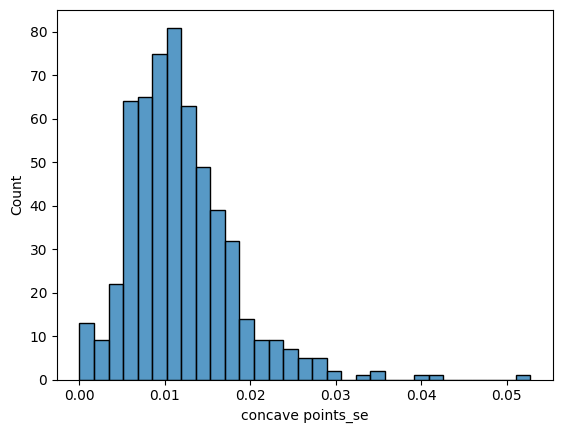

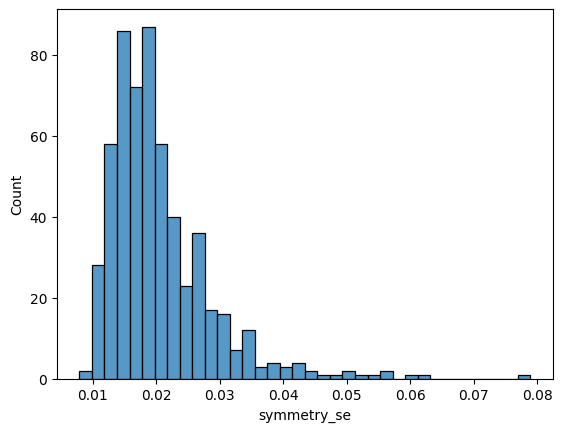

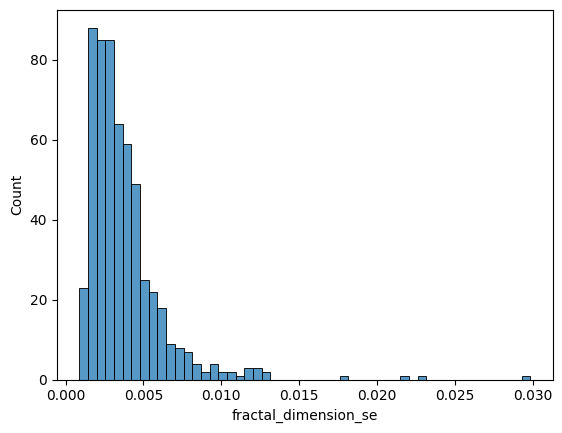

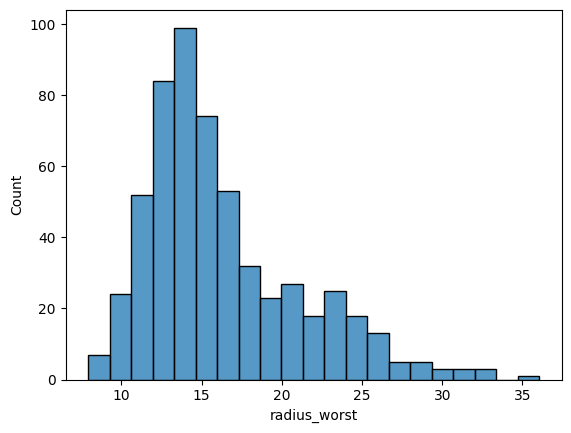

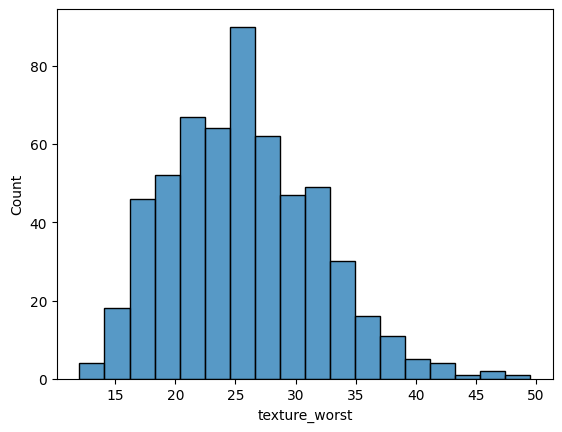

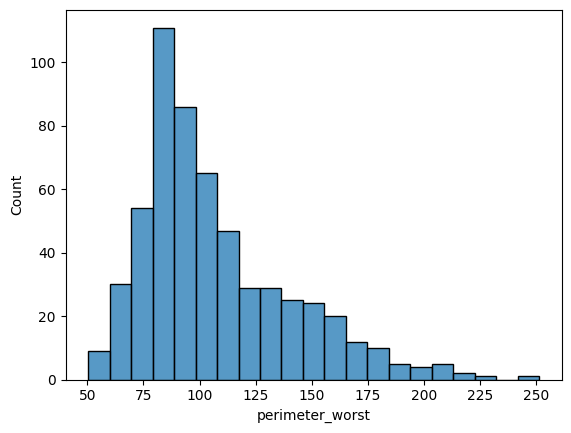

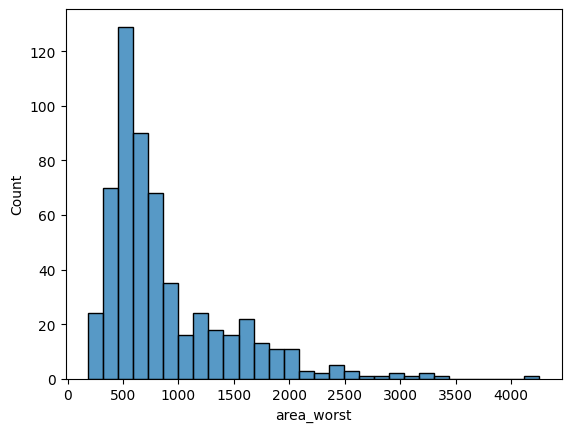

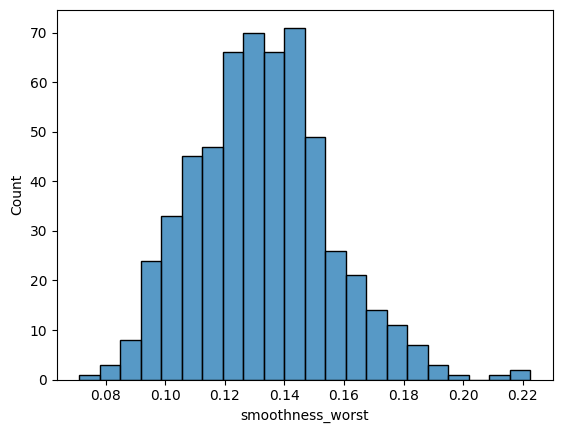

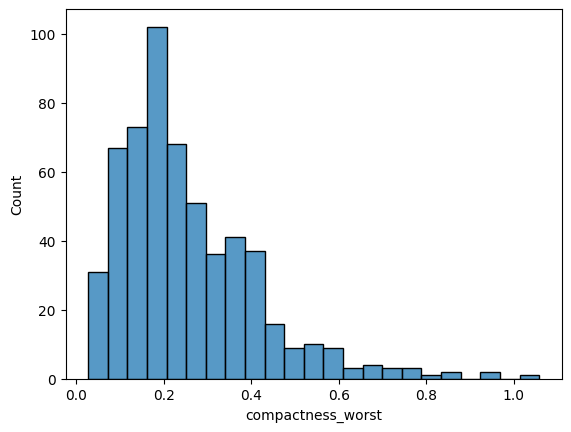

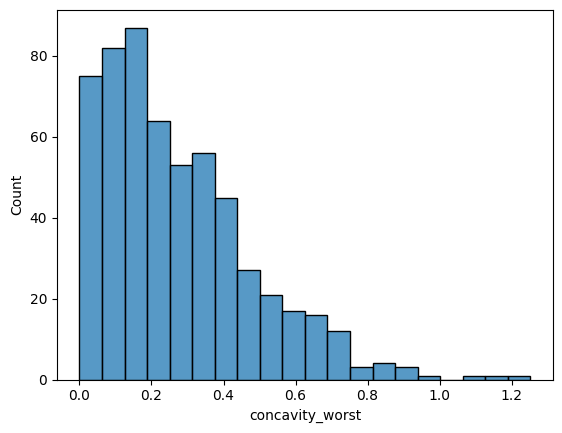

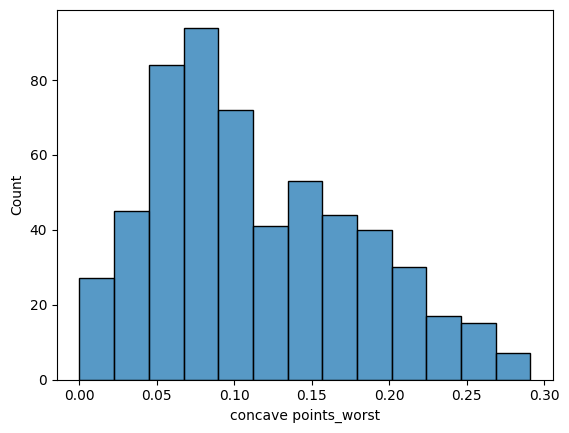

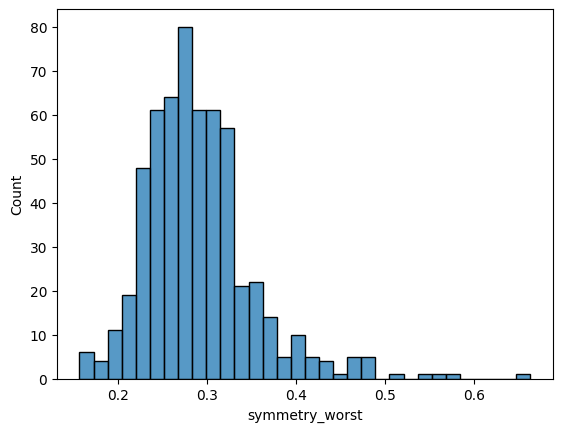

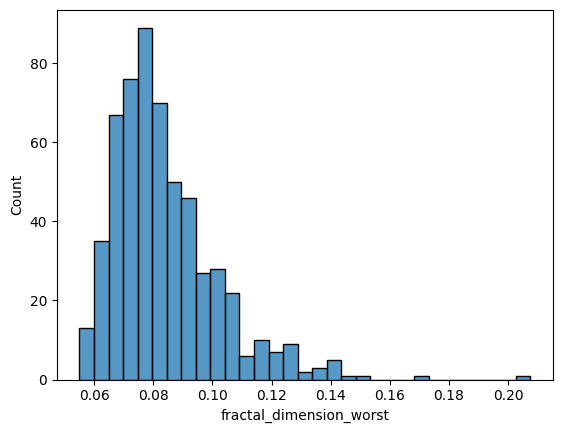

In [62]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        sns.histplot(data=data, x=column)
        plt.show()

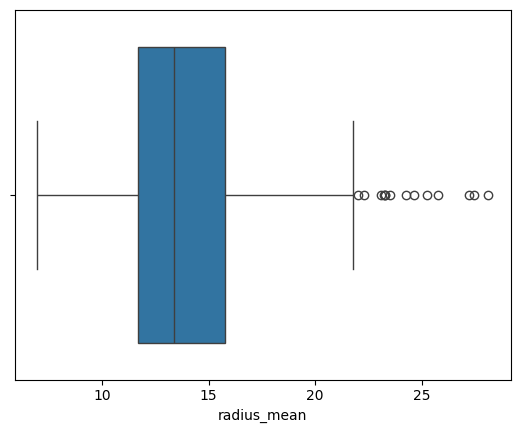

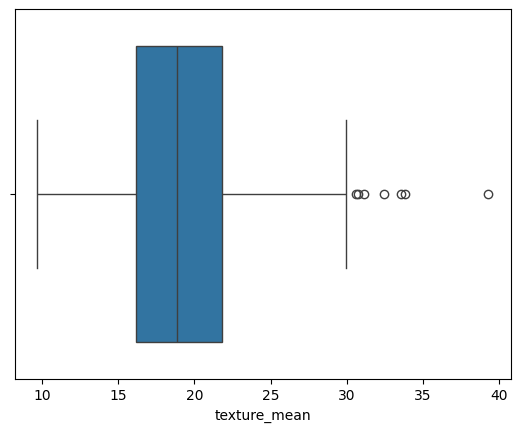

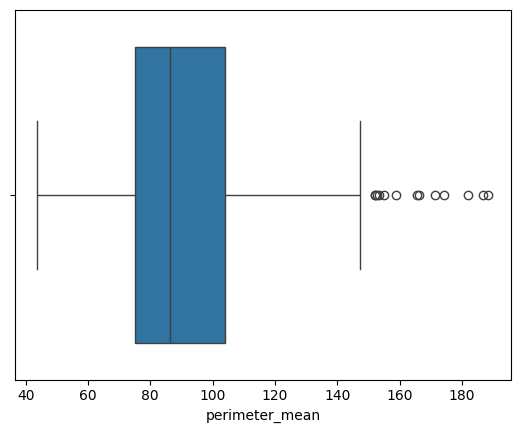

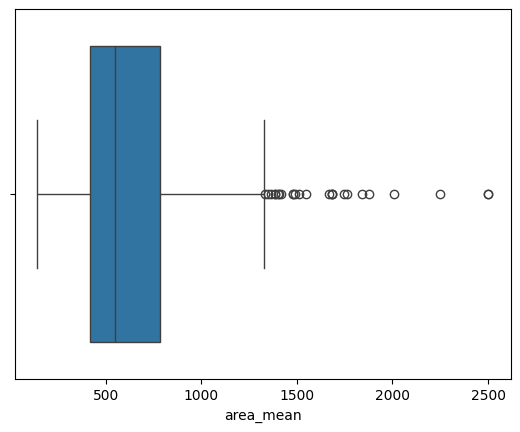

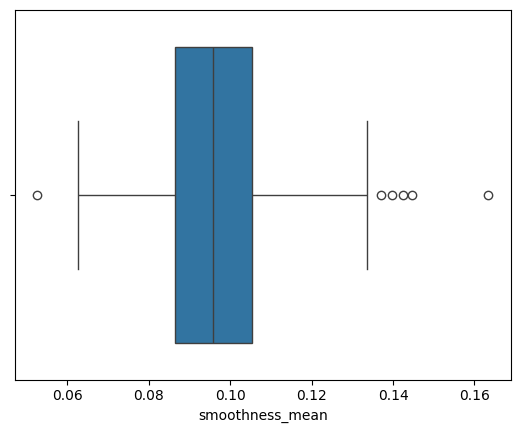

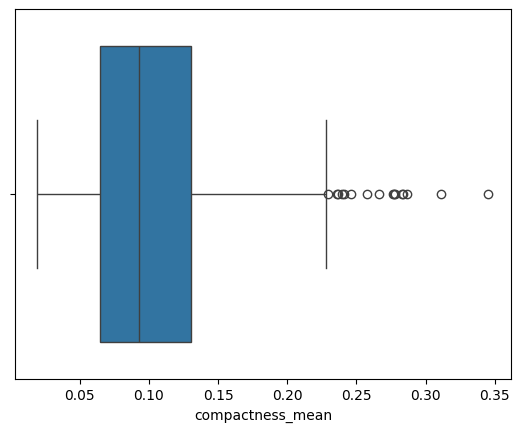

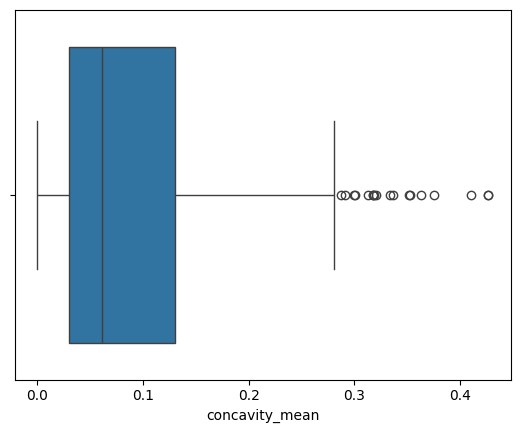

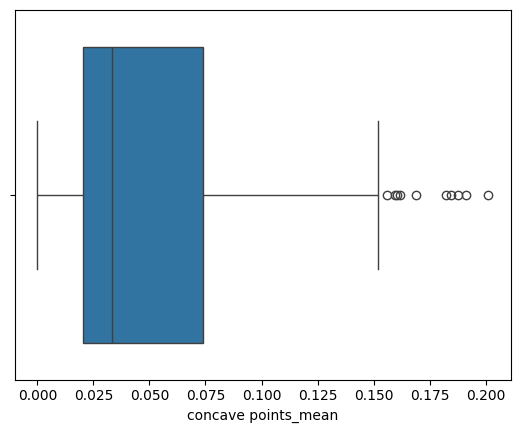

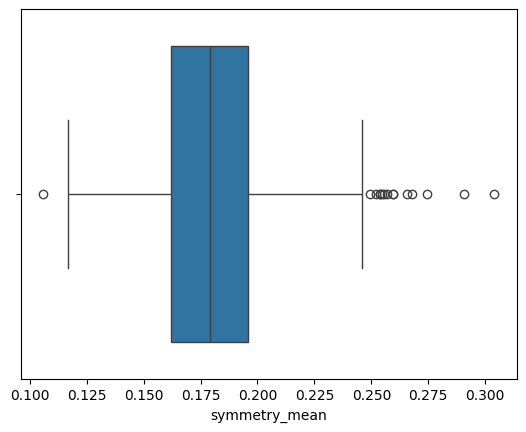

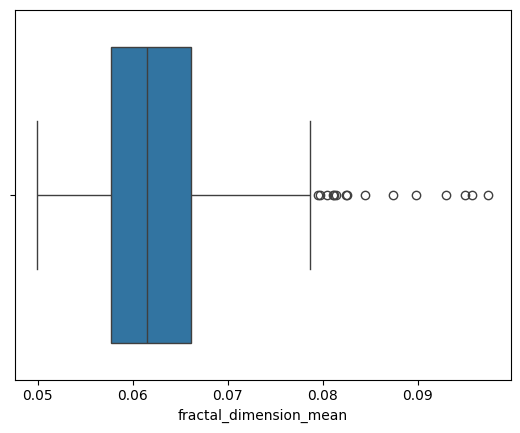

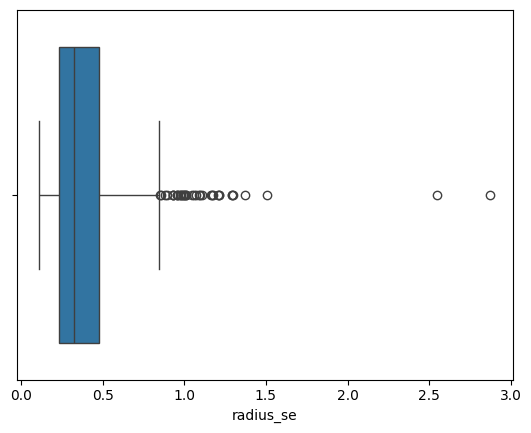

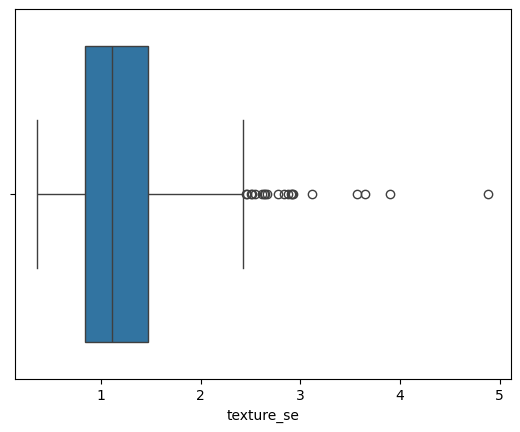

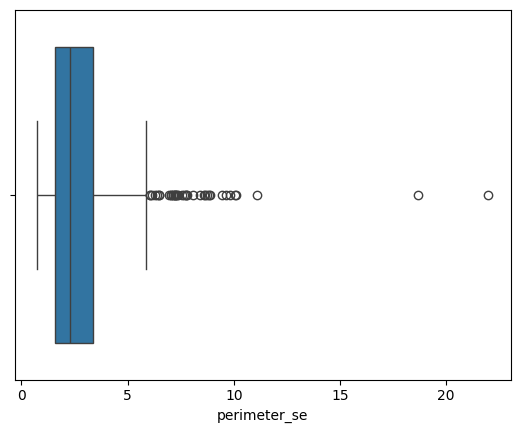

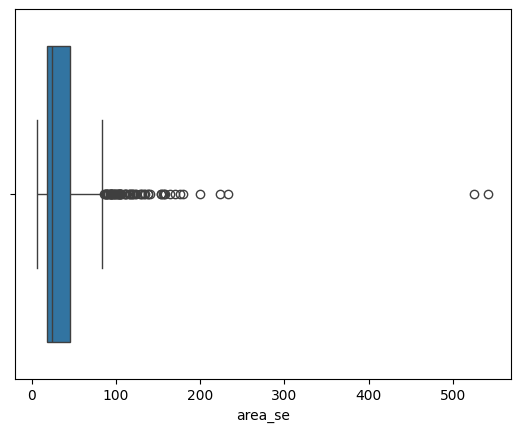

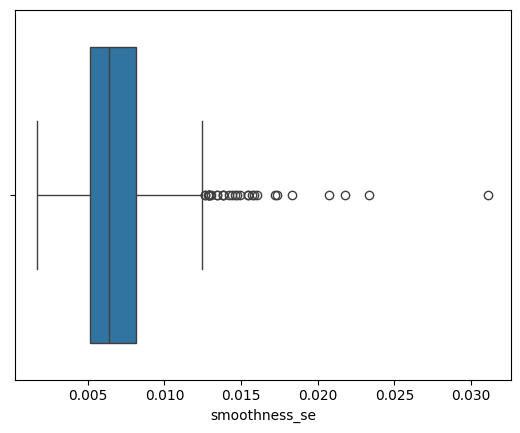

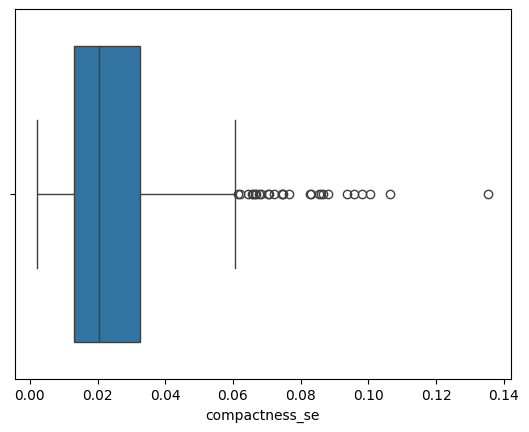

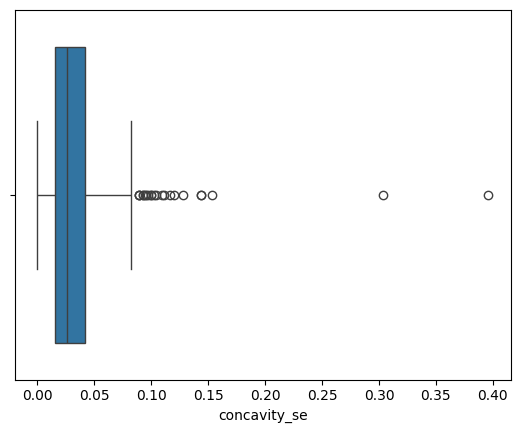

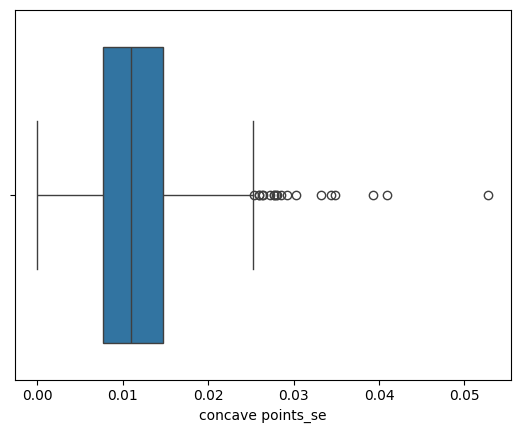

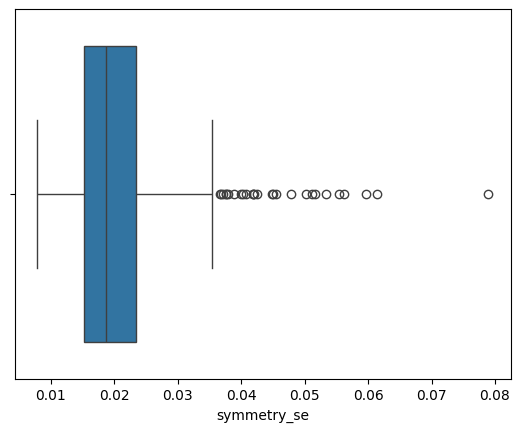

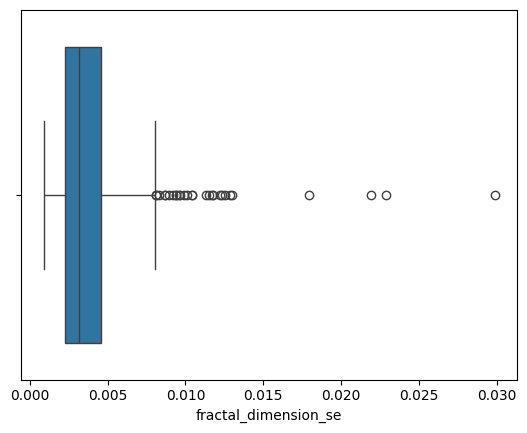

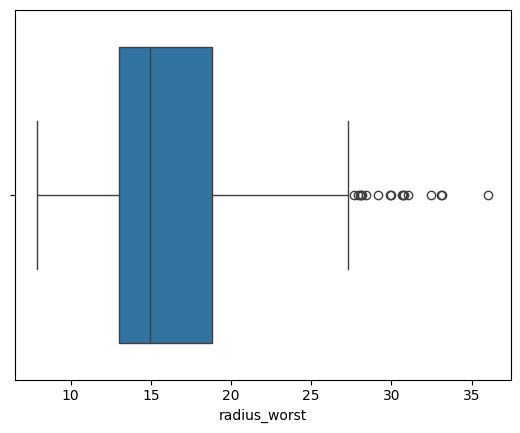

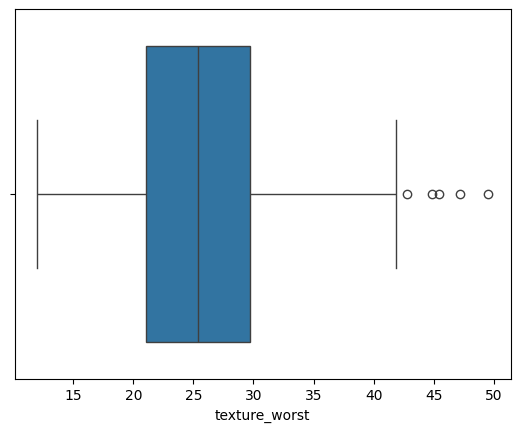

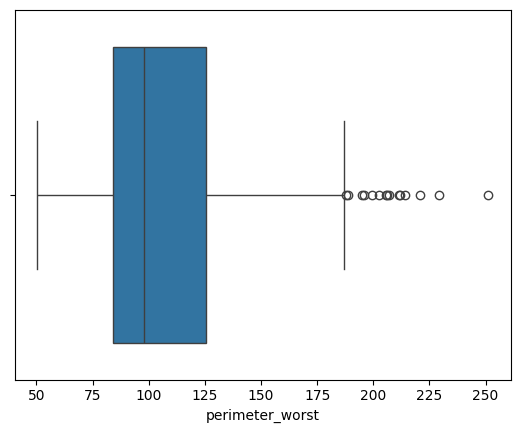

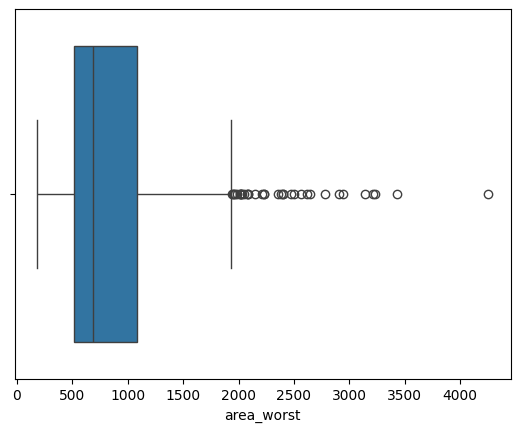

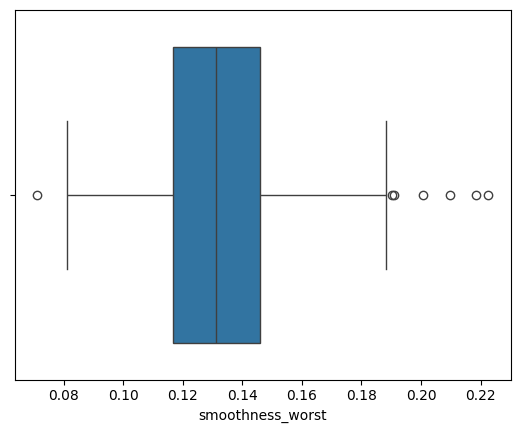

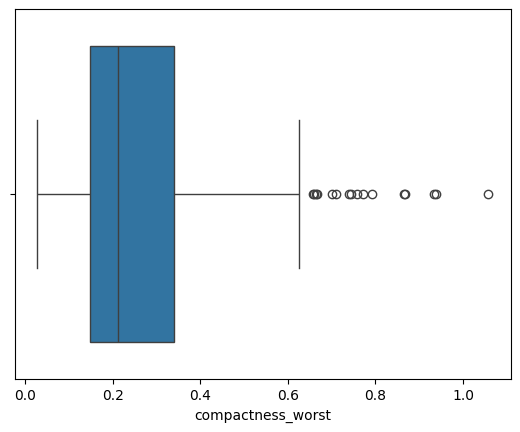

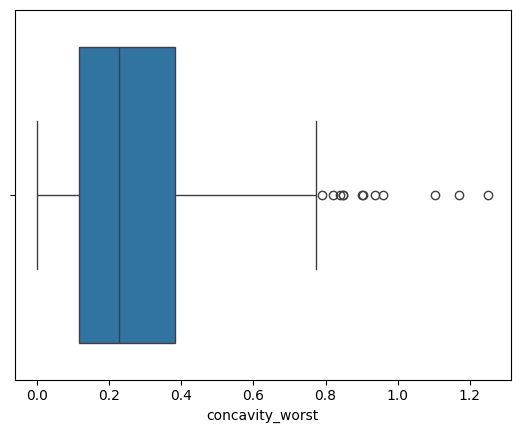

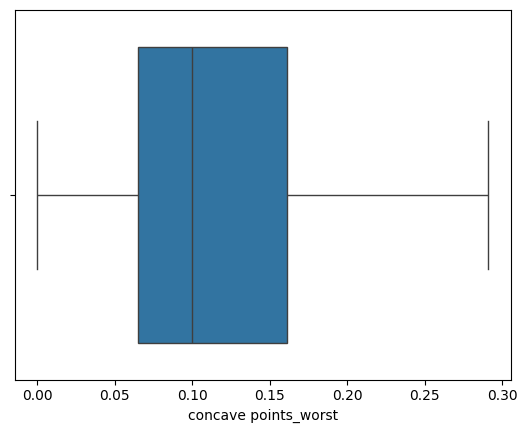

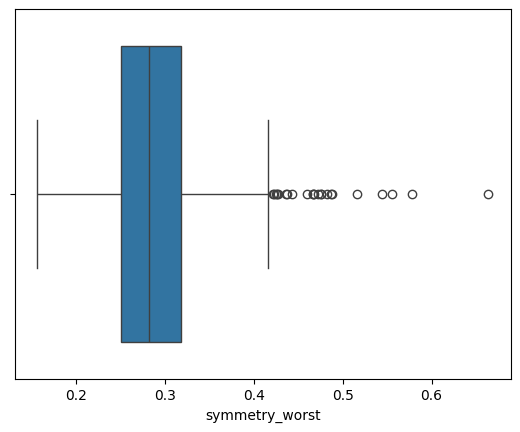

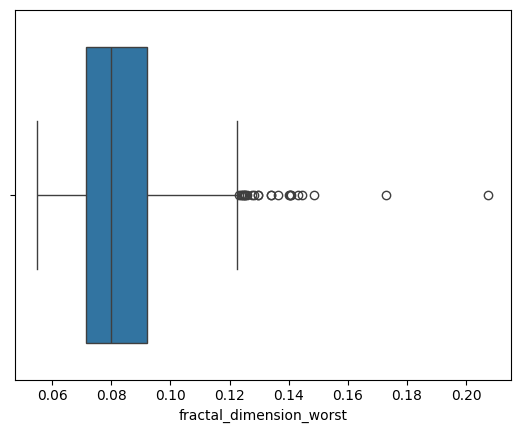

In [63]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        sns.boxplot(data=data, x=column)
        plt.show()

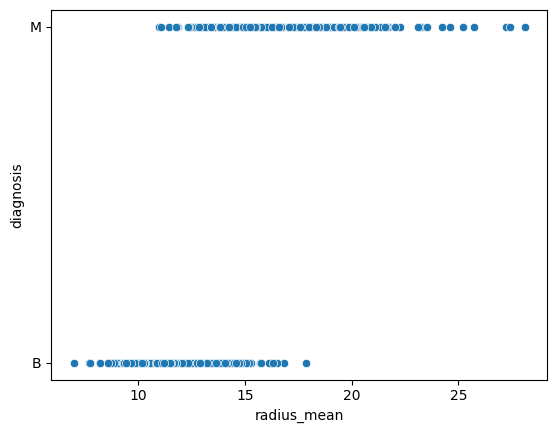

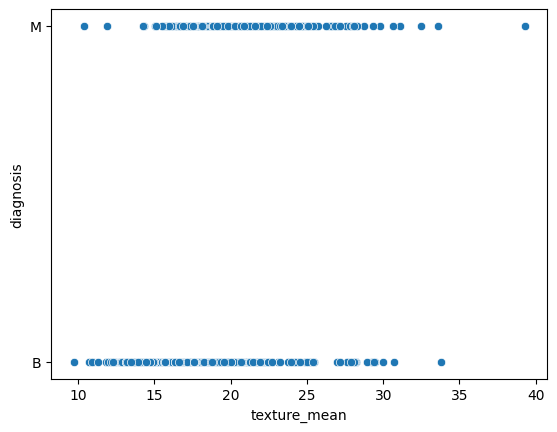

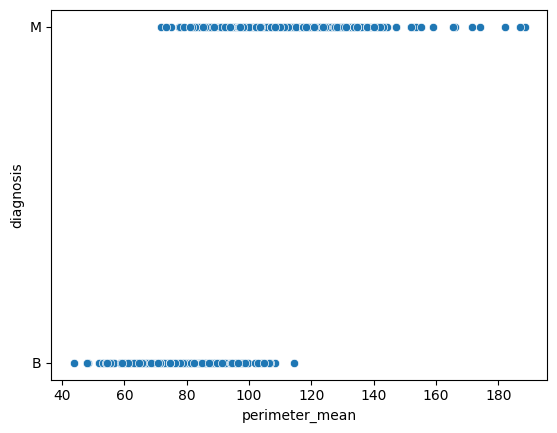

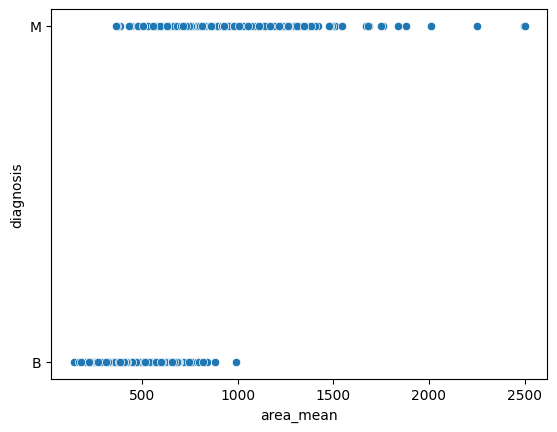

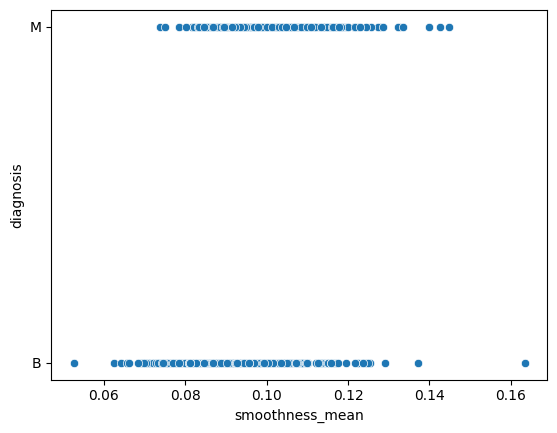

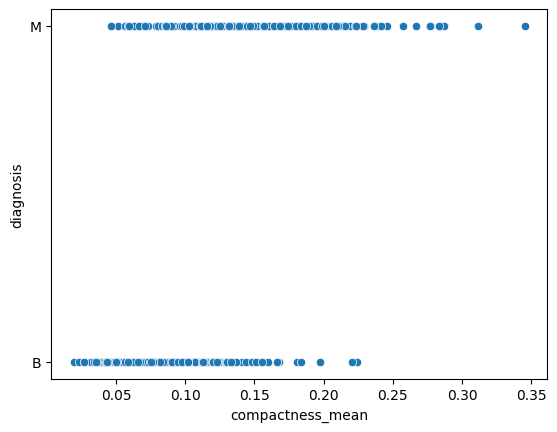

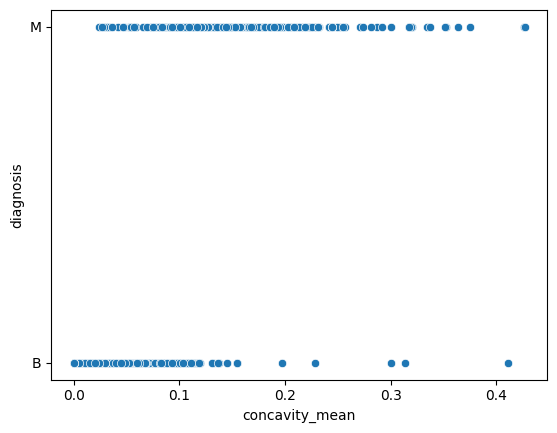

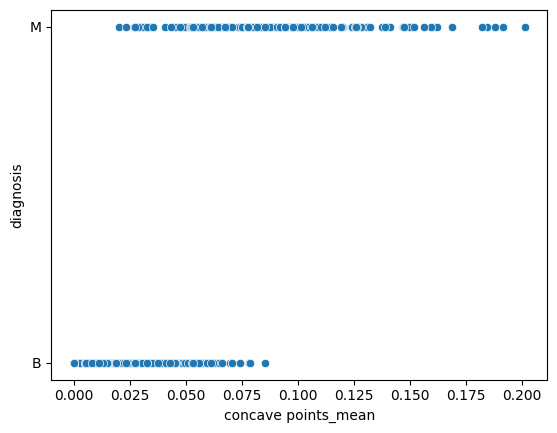

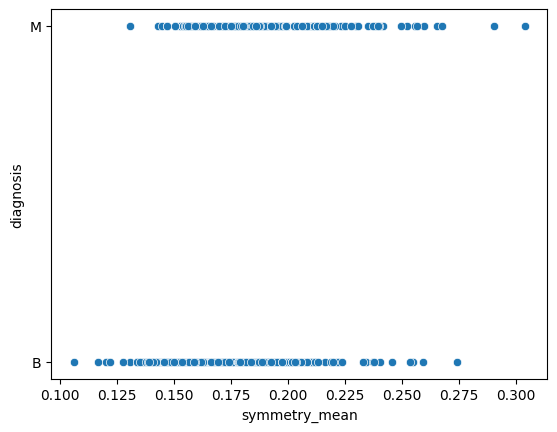

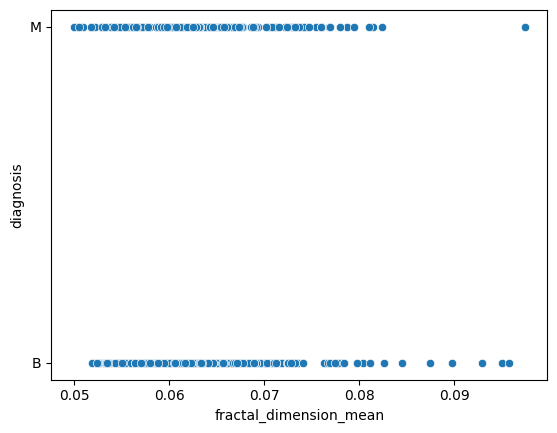

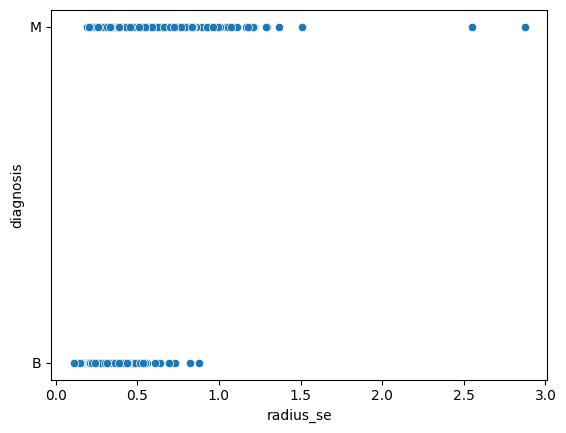

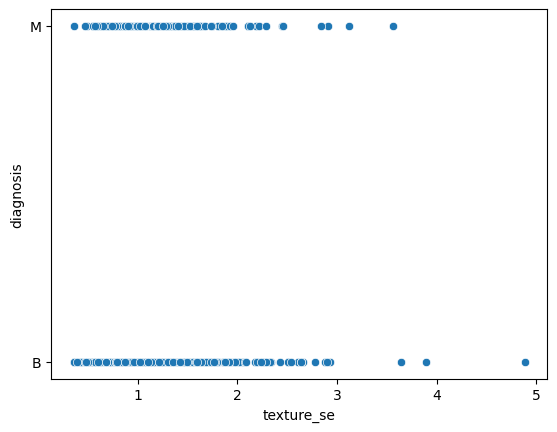

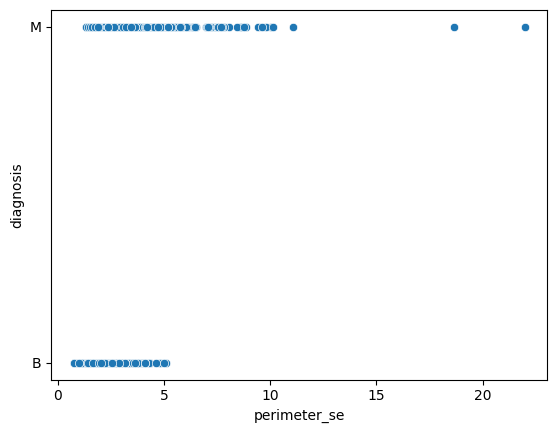

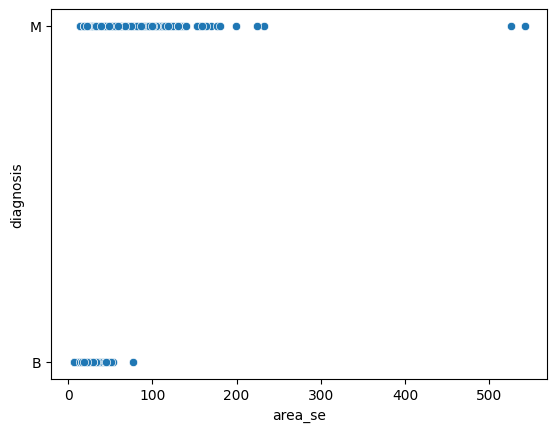

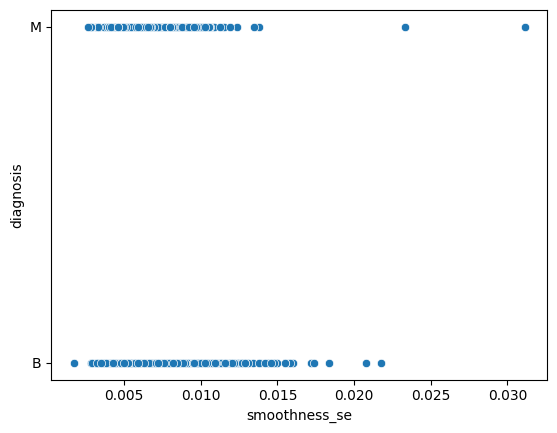

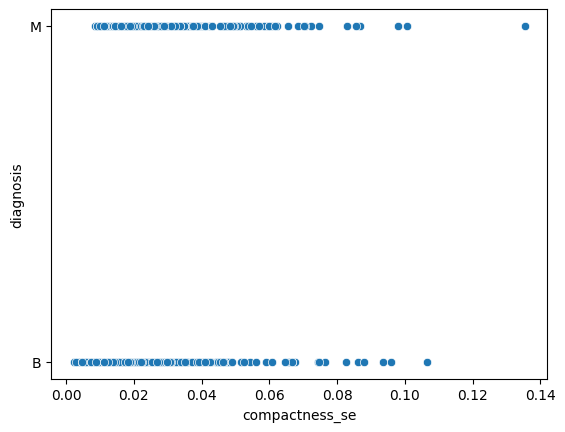

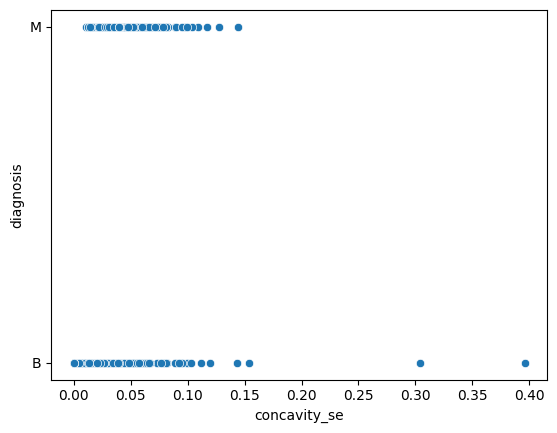

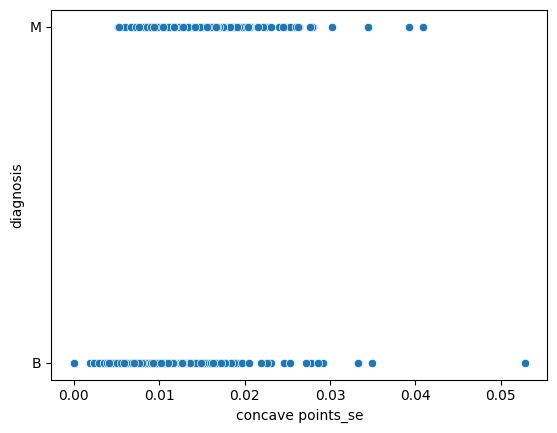

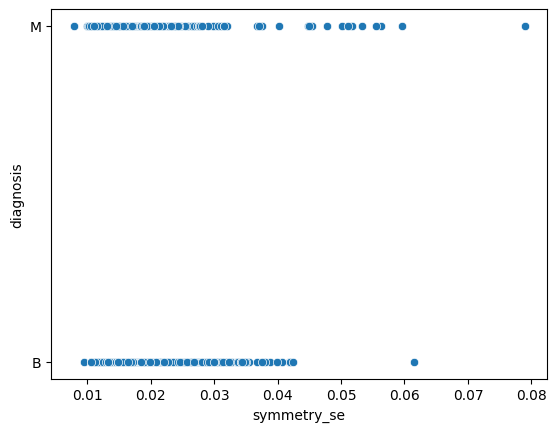

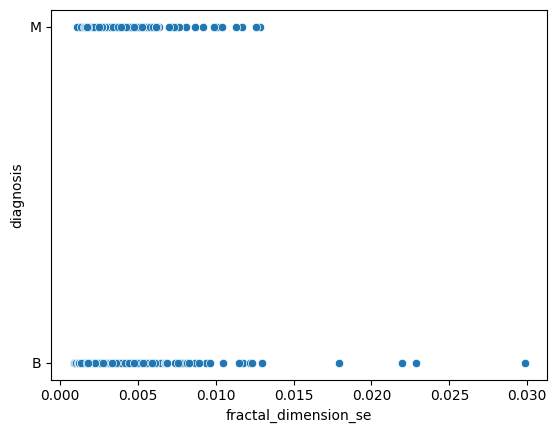

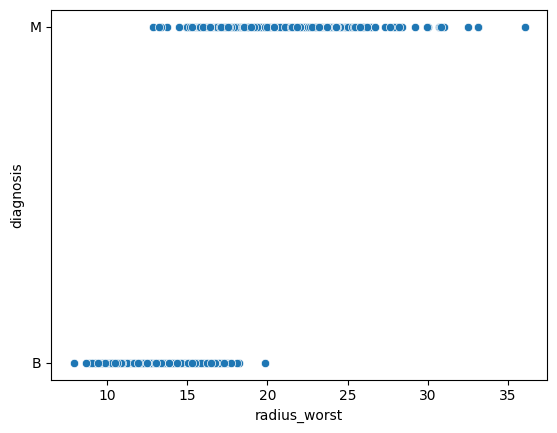

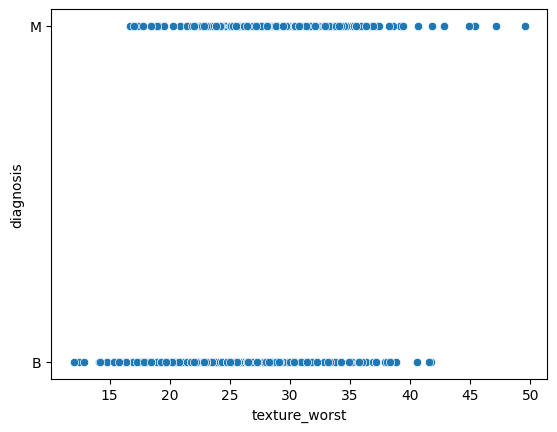

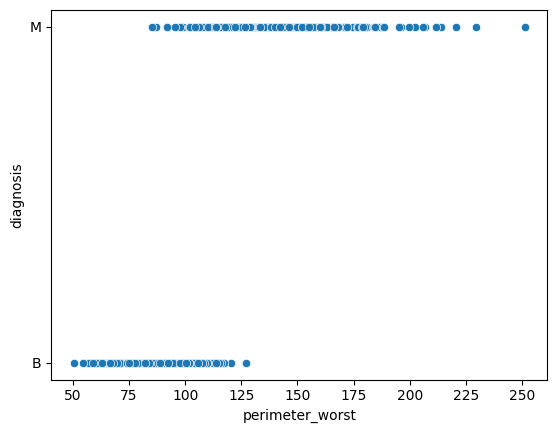

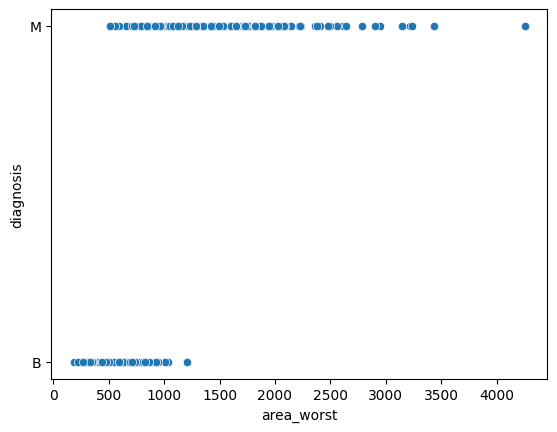

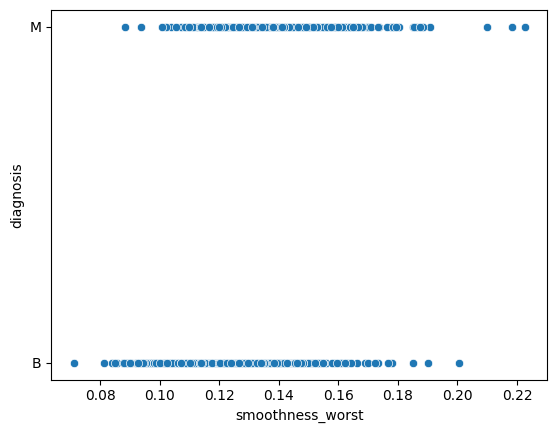

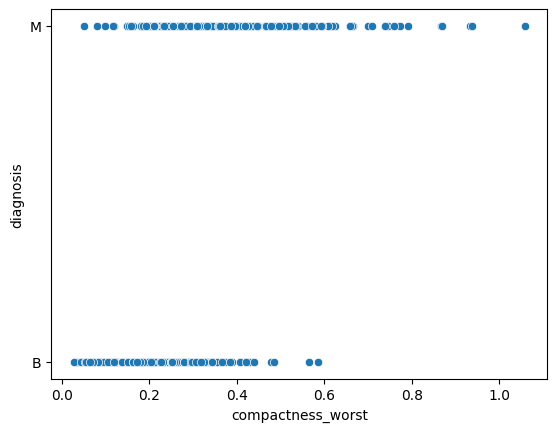

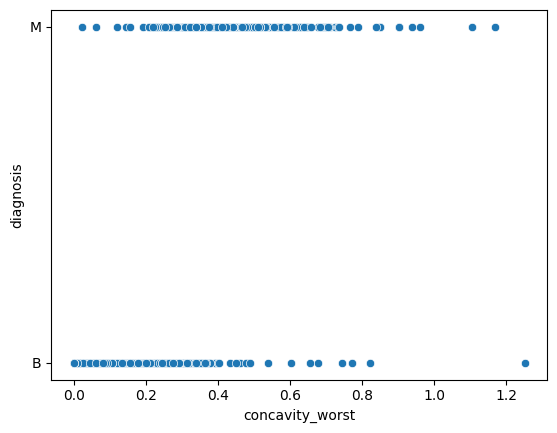

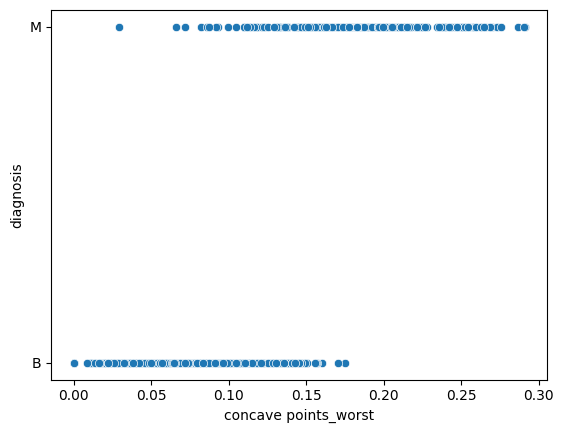

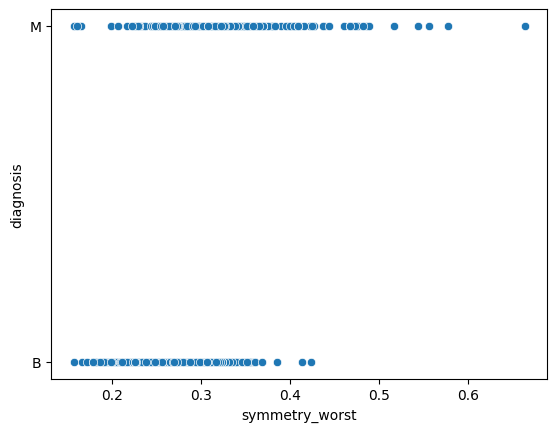

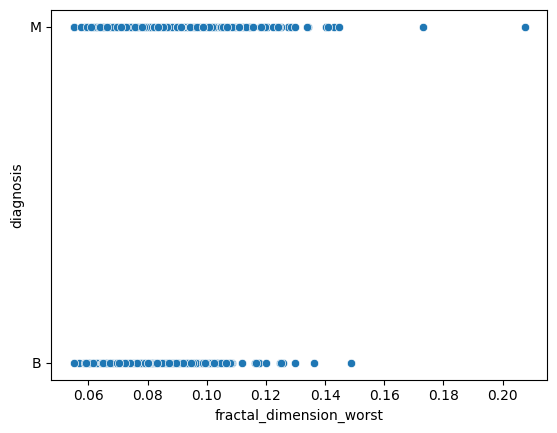

In [64]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        sns.scatterplot(data=data, x=column, y="diagnosis")
        plt.show()

In [65]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        print (f"{column}: Skewness: {data[column].skew()}, Kurtosis: {data[column].kurt()}")

radius_mean: Skewness: 0.9423795716730992, Kurtosis: 0.8455216229065377
texture_mean: Skewness: 0.6504495420828159, Kurtosis: 0.7583189723727752
perimeter_mean: Skewness: 0.9906504253930081, Kurtosis: 0.9722135477110654
area_mean: Skewness: 1.6457321756240424, Kurtosis: 3.6523027623507582
smoothness_mean: Skewness: 0.45632376481955844, Kurtosis: 0.8559749303632245
compactness_mean: Skewness: 1.1901230311980404, Kurtosis: 1.650130467219256
concavity_mean: Skewness: 1.4011797389486722, Kurtosis: 1.9986375291042124
concave points_mean: Skewness: 1.1711800812336282, Kurtosis: 1.066555702965477
symmetry_mean: Skewness: 0.7256089733641999, Kurtosis: 1.2879329922294565
fractal_dimension_mean: Skewness: 1.3044888125755076, Kurtosis: 3.0058921201694933
radius_se: Skewness: 3.0886121663847574, Kurtosis: 17.686725966164644
texture_se: Skewness: 1.646443808753053, Kurtosis: 5.349168692469973
perimeter_se: Skewness: 3.443615202194899, Kurtosis: 21.40190492588045
area_se: Skewness: 5.447186284898394

#### Hasil EDA

1. Hampir semua fitur yang ada berdistribusi tidak normal karena hasil nilai skewness dan gambar menunjukkan bahwa mereka cenderung mengarah ke "Right Skewed"

2. Nilai kurtosis yang mengukur seberapa tinggi dan lebar ekor distribusi memberi gambaran kepekatan data di sekitar mean dan seberapa jauh data menyebar hingga ke ekor. Dengan nilai kurtosis yang acak tersebut artinya ada data yang menyebar rata, tapi ada juga nilai kurtosis tinggi artinya terdapat outliers.

- Nilai Skewness yang bagus -> Mendekati 0 artinya Distribusi Normal

- Nilai Kurtosis yang bagus -> Mendekati 3 artinya distribusi normal

Hal ini menyebabkan beberapa hal
- Fill NA dari data numeric akan menggunakan Median -> Karena data tidak berdistribusi secara normal, jadi lebih baik menggunakan nilai Median dibandingkan Mean (rata-rata)
- Fill NA dari data object akan menggunakan Modus (mode)

# Data Preprocessing

In [66]:
data.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

#### Anggep aja ada NA yaa, jadi aku lanjutin preprocessing-nya

In [67]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [68]:
missing_values = data.isna().sum() / len(data)
missing_values

radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
diagnosis                  0.0
dtype: float64

### Drop NA

In [69]:
for key, value in missing_values.items():
    if (value > 0.5):
        data = data.drop(columns=key)

### Fill NA

In [70]:
for column in data.columns:
    if (data[column].isna().any()):
        if (data[column].dtype == "object"):
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            data[column] = data[column].fillna(data[column].median())

### Encoding (Categorical -> Numerical Data Types)

In [71]:
encoder = LabelEncoder()
encoded = {}

for column in data.columns:
    if (data[column].dtype == "object"):
        data[column] = encoder.fit_transform(data[column])
        encoded[column] = {i:class_name for i, class_name in enumerate(encoder.classes_)}

In [72]:
encoded

{'diagnosis': {0: 'B', 1: 'M'}}

### Analisis Korelasi Fitur

<Axes: >

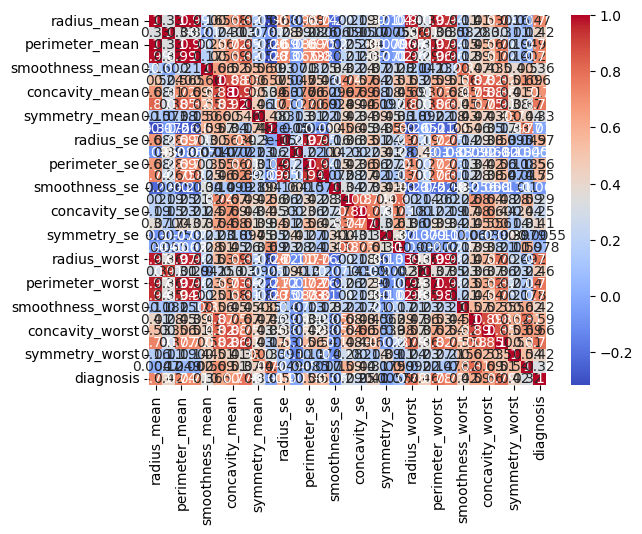

In [73]:
sns.heatmap(data=data[:-1].corr(), annot=True, cmap="coolwarm")

In [74]:
# sns.pairplot(data=data, hue="diagnosis")

### Splitting Data

In [75]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [76]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [77]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [79]:
def correlation(data_df, threshold):
    corr_col = set()
    corr_matrix = data_df.corr()
    print (corr_matrix)
    for i in range(len(corr_matrix.columns)):
        for j in range (i+1, len(corr_matrix.columns)):
            if (np.abs(corr_matrix.iloc[(i, j)]) > threshold):
                corr_col.add(corr_matrix.columns[j])
    
    return corr_col

In [80]:
corr_col = correlation(x_train, 0.9)
print (corr_col)
print (len(corr_col))

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.295781        0.997782   0.986567   
texture_mean                0.295781      1.000000        0.301439   0.294157   
perimeter_mean              0.997782      0.301439        1.000000   0.985843   
area_mean                   0.986567      0.294157        0.985843   1.000000   
smoothness_mean             0.184620     -0.035395        0.221975   0.190240   
compactness_mean            0.500843      0.226273        0.552779   0.492712   
concavity_mean              0.666528      0.298030        0.707412   0.678039   
concave points_mean         0.820847      0.277951        0.850017   0.822315   
symmetry_mean               0.163597      0.108081        0.201581   0.165832   
fractal_dimension_mean     -0.304115     -0.057593       -0.252429  -0.276261   
radius_se                   0.684766      0.260050        0.698458   0.738712   
texture_se                 -

In [81]:
x_train = x_train.drop(columns=corr_col, axis=1)
x_test = x_test.drop(columns=corr_col, axis=1)

### Scaling

In [82]:
scaler_x_minmax = MinMaxScaler()
scaler_x_standard = StandardScaler()

In [83]:
def Scaling (x1, x2, scaler_x):
    x1 = scaler_x.fit_transform(x1)
    x2 = scaler_x.transform(x2)

    return x1, x2, scaler_x

In [84]:
x_train_1, x_test_1, scaler_x_minmax = Scaling(x_train, x_test, scaler_x_minmax)

In [85]:
x_train_2, x_test_2, scaler_x_standard = Scaling(x_train, x_test, scaler_x_standard)

### Prediction Scaling (MinMaxScaler)

In [86]:
model = GaussianNB()
model.fit(X=x_train_1, y=y_train)

y_pred = model.predict(x_test_1)

mse = mean_squared_error(y_pred, y_test)
rmse = root_mean_squared_error(y_pred, y_test)
roc = roc_auc_score(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

conf = confusion_matrix(y_pred, y_test)
report = classification_report(y_pred, y_test)

print (f"MSE {mse}")
print (f"RMSE {rmse}")
print (f"ROC Score {roc}")

print (f"Accuracy {accuracy}")
print (f"Precision {precision}")
print (f"Recall {recall}")

print (f"Confusion Matrix {conf}")
print (f"Classification Report {report}")


MSE 0.07017543859649122
RMSE 0.26490647141300877
ROC Score 0.9344594594594594
Accuracy 0.9298245614035088
Precision 0.8636363636363636
Recall 0.95
Confusion Matrix [[68  6]
 [ 2 38]]
Classification Report               precision    recall  f1-score   support

           0       0.97      0.92      0.94        74
           1       0.86      0.95      0.90        40

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



In [87]:
model = LogisticRegression()
model.fit(X=x_train_1, y=y_train)

y_pred = model.predict(x_test_1)

mse = mean_squared_error(y_pred, y_test)
rmse = root_mean_squared_error(y_pred, y_test)
roc = roc_auc_score(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

conf = confusion_matrix(y_test, y_pred)
report = classification_report(y_pred, y_test)

print (f"MSE {mse}")
print (f"RMSE {rmse}")
print (f"ROC Score {roc}")

print (f"Accuracy {accuracy}")
print (f"Precision {precision}")
print (f"Recall {recall}")

print (f"Confusion Matrix {conf}")
print (f"Classification Report {report}")


MSE 0.043859649122807015
RMSE 0.20942695414584775
ROC Score 0.9666666666666667
Accuracy 0.956140350877193
Precision 0.8863636363636364
Recall 1.0
Confusion Matrix [[70  0]
 [ 5 39]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.93      0.97        75
           1       0.89      1.00      0.94        39

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



### Prediction Scaling (Standard Scaling)

In [88]:
model = GaussianNB()
model.fit(X=x_train_2, y=y_train)

y_pred = model.predict(x_test_2)

mse = mean_squared_error(y_pred, y_test)
rmse = root_mean_squared_error(y_pred, y_test)
roc = roc_auc_score(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

conf = confusion_matrix(y_pred, y_test)
report = classification_report(y_pred, y_test)

print (f"MSE {mse}")
print (f"RMSE {rmse}")
print (f"ROC Score {roc}")

print (f"Accuracy {accuracy}")
print (f"Precision {precision}")
print (f"Recall {recall}")

print (f"Confusion Matrix {conf}")
print (f"Classification Report {report}")


MSE 0.07017543859649122
RMSE 0.26490647141300877
ROC Score 0.9344594594594594
Accuracy 0.9298245614035088
Precision 0.8636363636363636
Recall 0.95
Confusion Matrix [[68  6]
 [ 2 38]]
Classification Report               precision    recall  f1-score   support

           0       0.97      0.92      0.94        74
           1       0.86      0.95      0.90        40

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



In [89]:
model = LogisticRegression()
model.fit(X=x_train_2, y=y_train)

y_pred = model.predict(x_test_2)

mse = mean_squared_error(y_pred, y_test)
rmse = root_mean_squared_error(y_pred, y_test)
roc = roc_auc_score(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

conf = confusion_matrix(y_test, y_pred)
report = classification_report(y_pred, y_test)

print (f"MSE {mse}")
print (f"RMSE {rmse}")
print (f"ROC Score {roc}")

print (f"Accuracy {accuracy}")
print (f"Precision {precision}")
print (f"Recall {recall}")

print (f"Confusion Matrix {conf}")
print (f"Classification Report {report}")


MSE 0.02631578947368421
RMSE 0.16222142113076254
ROC Score 0.9794520547945206
Accuracy 0.9736842105263158
Precision 0.9318181818181818
Recall 1.0
Confusion Matrix [[70  0]
 [ 3 41]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.93      1.00      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



### Kesimpulan Classification

Karena nilai Accuracy dari Logistic Regression > daripada Naive Bayes Model, maka kesimpulan yang bisa diperoleh adalah:

1. Data features yang ada pada dataset tersebut bersifat dependent terhadap satu dengan yang lainnya, karena Naive Bayes menggunakan asumsi Naive, dimana asumsi tersebut seperti menyatakan bahwa setiap fitur bersifat independent, namun kenyataannya akurasi Logistic Regression lebih tinggi, sehingga bisa dibilang data-data pada dataset ini bersifat dependent terhadap satu dengan yang lainnya.

2. Data tidak berdistribusi normal, penyebaran data tidak merata, karena Akurasi Logistic lebih tinggi

3. Dataset sudah lumayan stabil dan tidak terlalu banyak noise, karena jika banyak noise seharusnya akurasi Naive Bayes lebih tinggi, karena Naive Bayes bisa tahan terhadap noise akibat asumsi Naive tersebut.

4. Pemisahan kelas dan fitur bersifat linear, artinya lebih banyak data yang bersifat numeric dibandingkan categorical, karena Naive Bayes lebih cocok dalam Multi Classification, dimana terdapat cukup banyak kolom yang bersifat categorical.

# Predicted Values vs  Actual Values

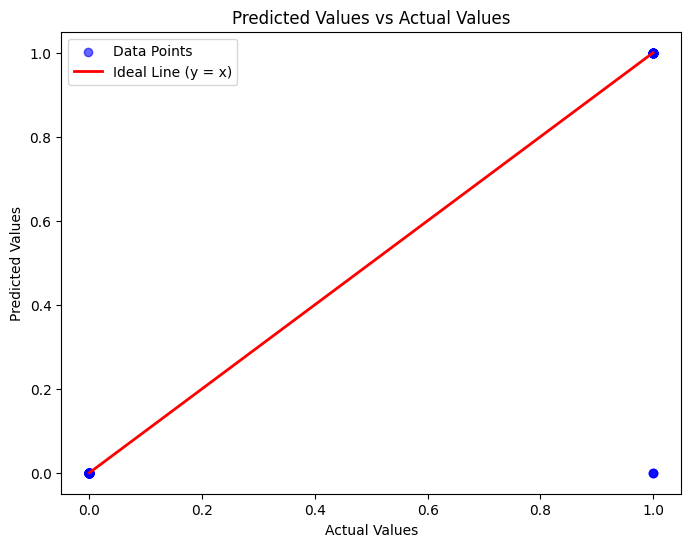

In [90]:
# 1. Membandingkan Predicted Values dan Actual Values
plt.figure(figsize=(8, 6))

# Scatter plot antara Predicted dan Actual
plt.scatter(y_test, y_pred, color='blue', label='Data Points', alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', lw=2, label="Ideal Line (y = x)")  # Garis ideal
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Values')
plt.legend()
plt.show()

In [91]:
errors = np.sum(y_test != y_pred)
print(f'Jumlah kesalahan prediksi: {errors} dari {len(y_test)} sampel')

Jumlah kesalahan prediksi: 3 dari 114 sampel


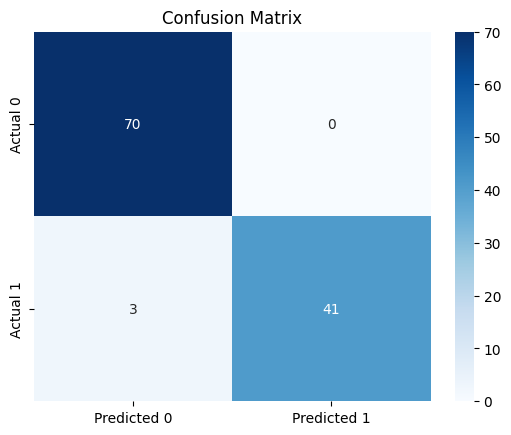

In [92]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()